In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\grvmh\Downloads\cars_data_final.csv")
data

,Unnamed: 0,location,year,run,fuel,trans,owner,mileage,engine,power,seats,brand,model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,Wagon
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,Creta
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,Jazz
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,Ertiga
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,Volkswagen,Vento
7069,7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,Volkswagen,Polo
7070,7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,Nissan,Micra
7071,7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,Volkswagen,Polo


In [3]:
data.isna().sum()

Unnamed: 0    0
location      0
year          0
run           0
fuel          0
trans         0
owner         0
mileage       0
engine        0
power         0
seats         0
brand         0
model         0
dtype: int64

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.mileage.min()

np.float64(0.0)

In [6]:
data[data['mileage']!=0] #removing 0 mileage data

,Unnamed: 0,location,year,run,fuel,trans,owner,mileage,engine,power,seats,brand,model
0,0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,Wagon
1,1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,Creta
2,2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,Jazz
3,3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,Ertiga
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,Volkswagen,Vento
7069,7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,Volkswagen,Polo
7070,7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,Nissan,Micra
7071,7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,Volkswagen,Polo


In [7]:
data=data.drop(['Unnamed: 0','location','fuel','trans','owner','brand','model','year','seats','run'], axis=1)

In [8]:
data

,mileage,engine,power
0,26.60,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80
...,...,...,...
7068,20.54,1598.0,103.60
7069,17.21,1197.0,103.60
7070,23.08,1461.0,63.10
7071,17.20,1197.0,103.60


# scaling data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
X_scaled=scaler.fit_transform(data)

In [12]:
X_scaled

array([[ 1.91356961, -1.04556205, -1.02111438],
       [ 0.31982844, -0.06546297,  0.25069586],
       [-0.01823787, -0.70823343, -0.45025776],
       ...,
       [ 1.10405029, -0.26853145, -0.92877542],
       [-0.24821495, -0.71158993, -0.17174552],
       [-1.90404994,  0.88442757,  1.06940967]])

# PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA(n_components=2, random_state=42)

In [15]:
X_pca=pca.fit_transform(X_scaled)

In [16]:
X_pca

array([[-2.24246979,  0.86179973],
       [-0.05782455,  0.37295901],
       [-0.69357327, -0.40731784],
       ...,
       [-1.28886148,  0.41803471],
       [-0.41123434, -0.46845812],
       [ 2.16688468, -0.8708099 ]])

In [17]:
data['PCA1']=X_pca[:,0]

In [18]:
data['PCA2']=X_pca[:,1]

In [19]:
data

,mileage,engine,power,PCA1,PCA2
0,26.60,998.0,58.16,-2.242470,0.861800
1,19.67,1582.0,126.20,-0.057825,0.372959
2,18.20,1199.0,88.70,-0.693573,-0.407318
3,20.77,1248.0,88.76,-0.949085,0.111309
4,15.20,1968.0,140.80,1.036586,-0.200506
...,...,...,...,...,...
7068,20.54,1598.0,103.60,-0.395447,0.345887
7069,17.21,1197.0,103.60,-0.412428,-0.466522
7070,23.08,1461.0,63.10,-1.288861,0.418035
7071,17.20,1197.0,103.60,-0.411234,-0.468458


In [20]:
import seaborn as sns

<Axes: xlabel='PCA1', ylabel='PCA2'>

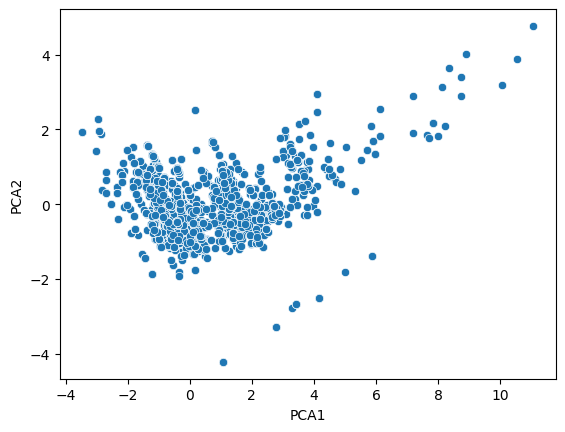

In [21]:
sns.scatterplot(x='PCA1', y='PCA2', data=data)

# CLustering

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia=[]

In [23]:
for x in range(2,11):
    kmeans=KMeans(n_clusters=x, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [24]:
inertia

[9610.165628846142,
 7254.622845481444,
 5545.880174904413,
 4819.2493736353135,
 4112.807507078654,
 3716.5126888072664,
 3366.861272243403,
 3014.5513882675427,
 2717.6718300309863]

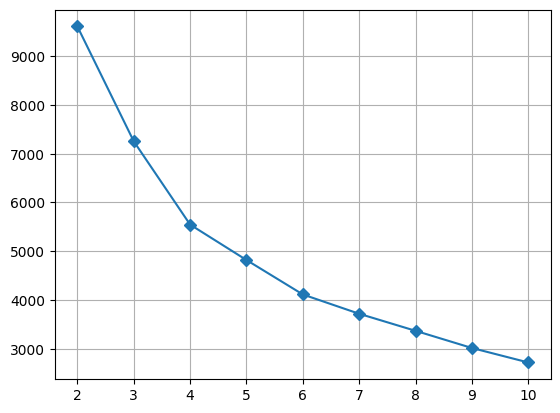

In [25]:
plt.plot(range(2,11), inertia, marker='D')
plt.grid()

In [26]:
kmeans=KMeans(n_clusters=4, random_state=42)

In [27]:
data['clusters']=kmeans.fit_predict(X_scaled)

In [28]:
data

,mileage,engine,power,PCA1,PCA2,clusters
0,26.60,998.0,58.16,-2.242470,0.861800,1
1,19.67,1582.0,126.20,-0.057825,0.372959,3
2,18.20,1199.0,88.70,-0.693573,-0.407318,3
3,20.77,1248.0,88.76,-0.949085,0.111309,3
4,15.20,1968.0,140.80,1.036586,-0.200506,0
...,...,...,...,...,...,...
7068,20.54,1598.0,103.60,-0.395447,0.345887,3
7069,17.21,1197.0,103.60,-0.412428,-0.466522,3
7070,23.08,1461.0,63.10,-1.288861,0.418035,1
7071,17.20,1197.0,103.60,-0.411234,-0.468458,3


<Axes: xlabel='PCA1', ylabel='PCA2'>

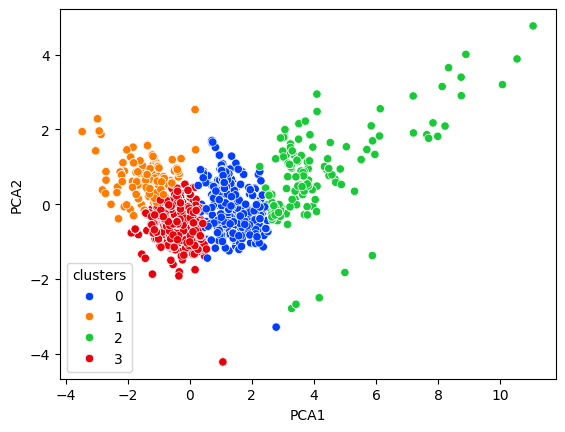

In [29]:
sns.scatterplot(x='PCA1',y='PCA2',hue='clusters',palette='bright', data=data)

<Axes: xlabel='PCA1', ylabel='PCA2'>

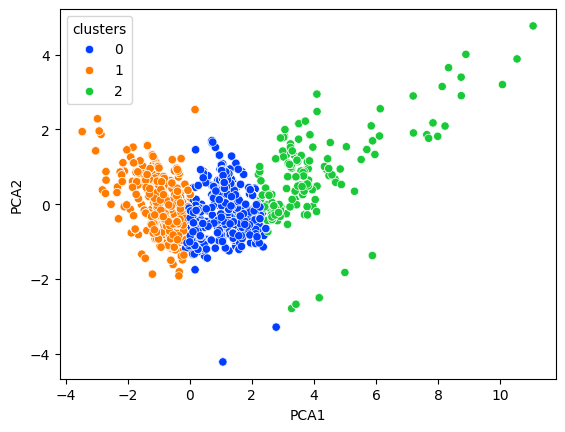

In [30]:
kmeans=KMeans(n_clusters=3, random_state=42)
data['clusters']=kmeans.fit_predict(X_scaled)
sns.scatterplot(x='PCA1',y='PCA2', hue='clusters', palette='bright', data=data)

<Axes: xlabel='PCA1', ylabel='PCA2'>

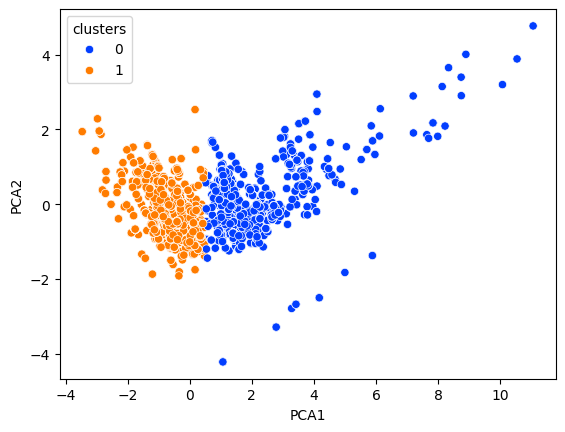

In [31]:
kmeans=KMeans(n_clusters=2, random_state=42)
data['clusters']=kmeans.fit_predict(X_scaled)
sns.scatterplot(x='PCA1',y='PCA2', hue='clusters', palette='bright', data=data)

<Axes: xlabel='PCA1', ylabel='PCA2'>

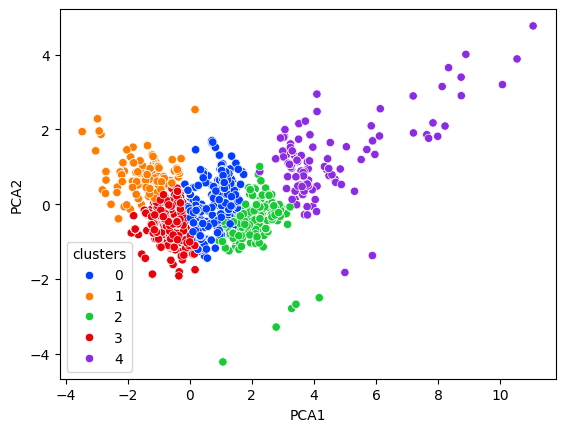

In [32]:
kmeans=KMeans(n_clusters=5, random_state=42)
data['clusters']=kmeans.fit_predict(X_scaled)
sns.scatterplot(x='PCA1',y='PCA2', hue='clusters', palette='bright', data=data)

<Axes: xlabel='PCA1', ylabel='PCA2'>

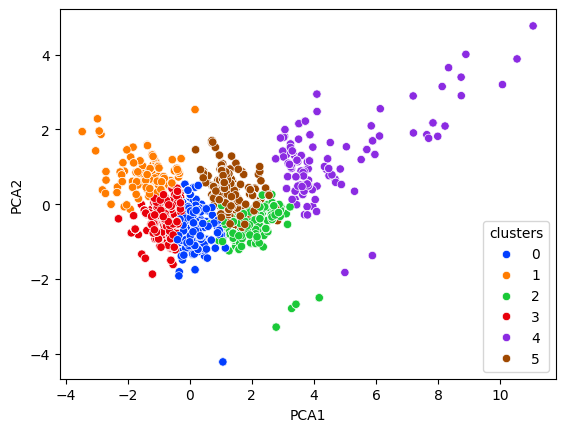

In [33]:
kmeans=KMeans(n_clusters=6, random_state=42)
data['clusters']=kmeans.fit_predict(X_scaled)
sns.scatterplot(x='PCA1',y='PCA2', hue='clusters', palette='bright', data=data)

<Axes: xlabel='PCA1', ylabel='PCA2'>

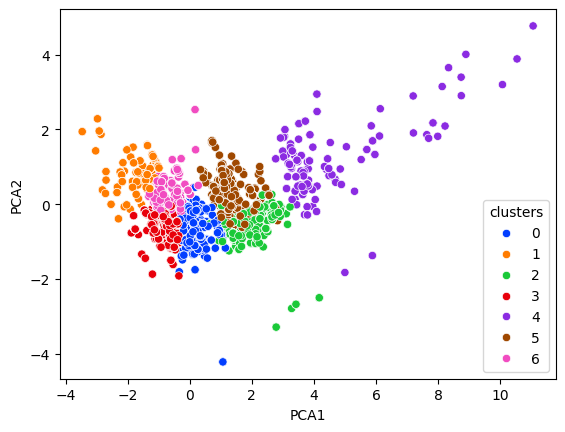

In [34]:
kmeans=KMeans(n_clusters=7, random_state=42)
data['clusters']=kmeans.fit_predict(X_scaled)
sns.scatterplot(x='PCA1', y='PCA2', data=data, hue='clusters', palette='bright')

In [35]:
data.to_csv('Cars data cluster analysis.csv')